In [1]:
%matplotlib inline

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

import histlite as hl
import csky as cy

import matplotlib as mpl
from matplotlib.lines import Line2D
mpl.style.use('/home/apizzuto/Nova/python3/scripts/novae_plots_nb.mplstyle')
#palette = sns.color_palette('Dark2')
palette = sns.color_palette('Paired')

## Begin with the offline sample
If trials don't exist, run `transient.py`

In [3]:
sinDecs = [-0.5, 0.0, 0.5]
inj_gamma = [2.0, 2.5, 3.0]
delta_ts = np.logspace(3., 7., 9)[::]

if os.path.exists('/data/user/apizzuto/fast_response_skylab/offline_vs_online_gfu/dump/gfu_offline_transient_sens_100tev.pkl'):
    with open('../dump/gfu_offline_transient_sens_100tev.pkl', 'rb') as f:
        all_gamma_results = pickle.load(f)
else:
    print("Need to run script")

In [4]:
def conv_ref_en(fl, e1, e0, gamma):
    return np.asarray(fl) * (e1/e0)**(2.-gamma)

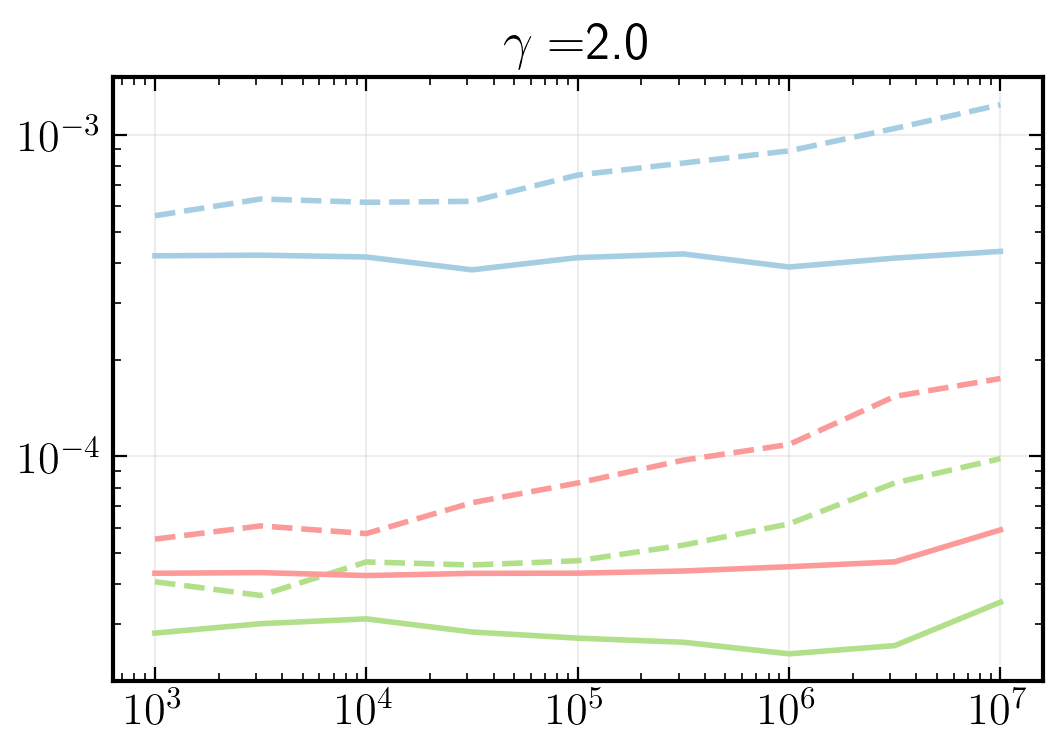

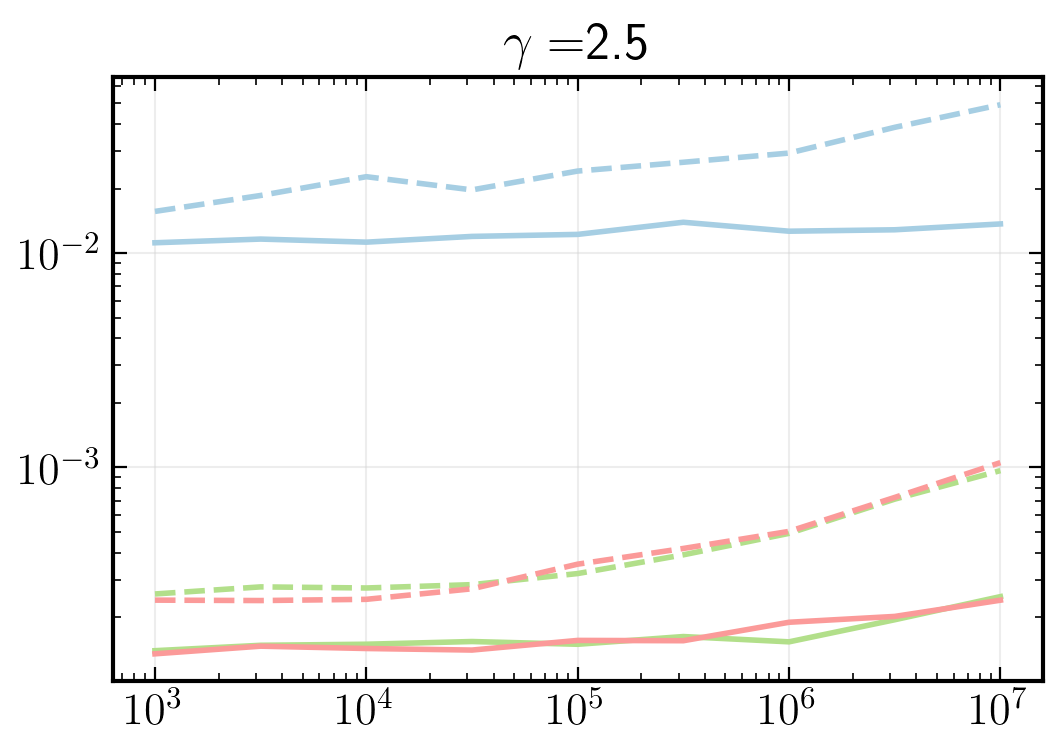

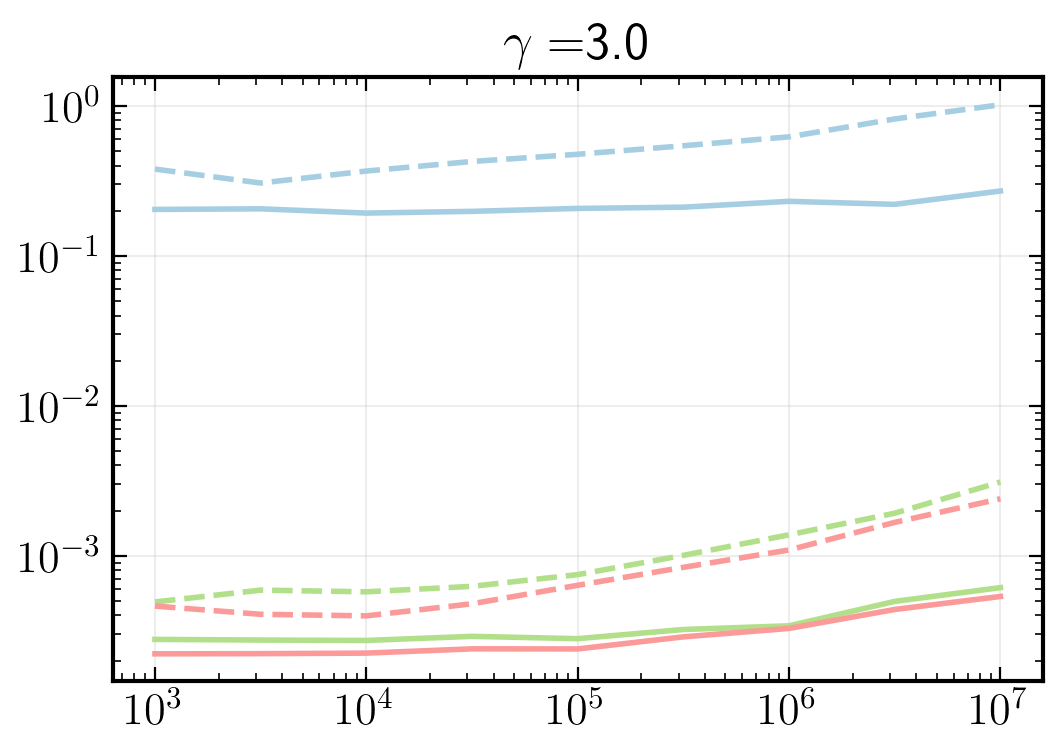

In [5]:
for gamma in inj_gamma:
    fig = plt.figure(dpi=200)
    for ii, sd in enumerate(all_gamma_results[gamma].keys()):
        one_tev_sens = conv_ref_en(all_gamma_results[gamma][sd]['sens_e2dnde'], 1., 100., gamma)
        one_tev_disc = conv_ref_en(all_gamma_results[gamma][sd]['disc_e2dnde'], 1., 100., gamma)
        plt.plot(all_gamma_results[gamma][sd]['delta_t'], one_tev_sens,
                color=palette[2*ii], lw=2., ls='-')
        plt.plot(all_gamma_results[gamma][sd]['delta_t'], one_tev_disc,
                color=palette[2*ii], lw=2., ls='--')
    
    plt.yscale('log')
    plt.title(r'$\gamma =$' + f'{gamma}')
    plt.xscale('log')
    plt.show()

## Now with GFUOnline

In [7]:
sinDecs = [-0.5, 0.0, 0.5]
inj_gamma = [2.0, 2.5, 3.0]
delta_ts = np.logspace(3., 7., 9)

if os.path.exists('/data/user/apizzuto/fast_response_skylab/offline_vs_online_gfu/dump/gfu_online_transient_sens_100tev.pkl'):
    with open('../dump/gfu_online_transient_sens_100tev.pkl', 'rb') as f:
        all_gamma_results_online = pickle.load(f)
else:
    print("Need to run script")

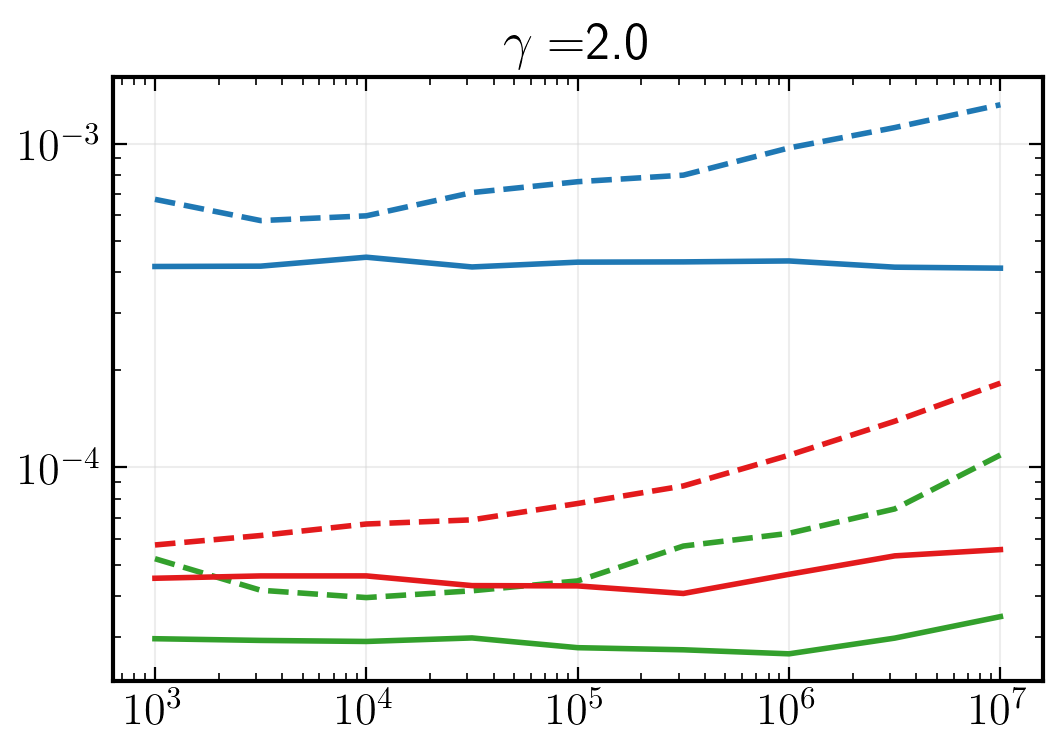

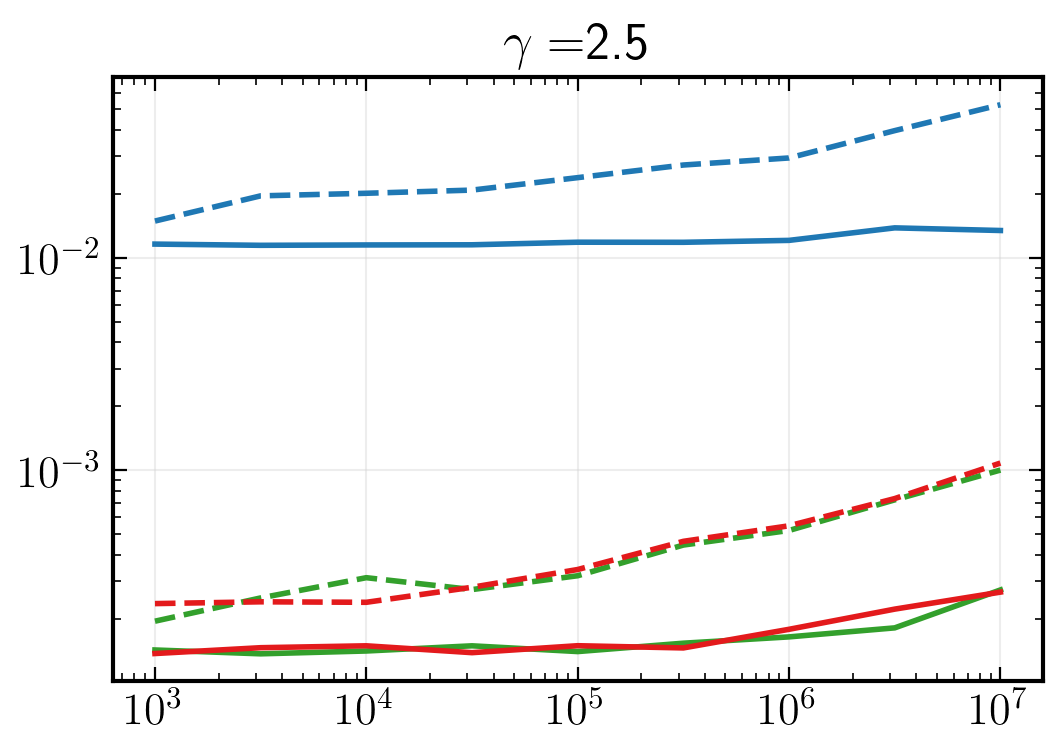

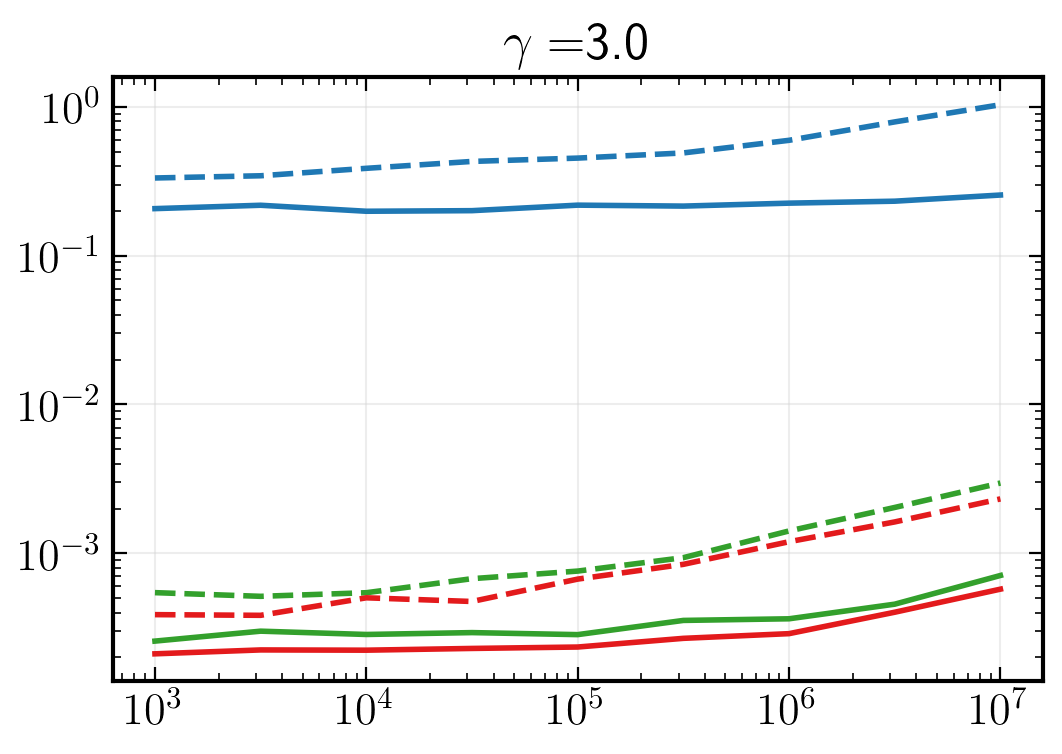

In [8]:
for gamma in inj_gamma:
    fig = plt.figure(dpi=200)
    for ii, sd in enumerate(all_gamma_results_online[gamma].keys()):
        one_tev_sens = conv_ref_en(all_gamma_results_online[gamma][sd]['sens_e2dnde'], 1., 100., gamma)
        one_tev_disc = conv_ref_en(all_gamma_results_online[gamma][sd]['disc_e2dnde'], 1., 100., gamma)
        plt.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_sens,
                color=palette[2*ii+1], lw=2., ls='-')
        plt.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_disc,
                color=palette[2*ii+1], lw=2., ls='--')
    
    plt.yscale('log')
    plt.title(r'$\gamma =$' + f'{gamma}')
    plt.xscale('log')
    plt.show()

## Now, for each spectrum, plot the comparions between online and offline

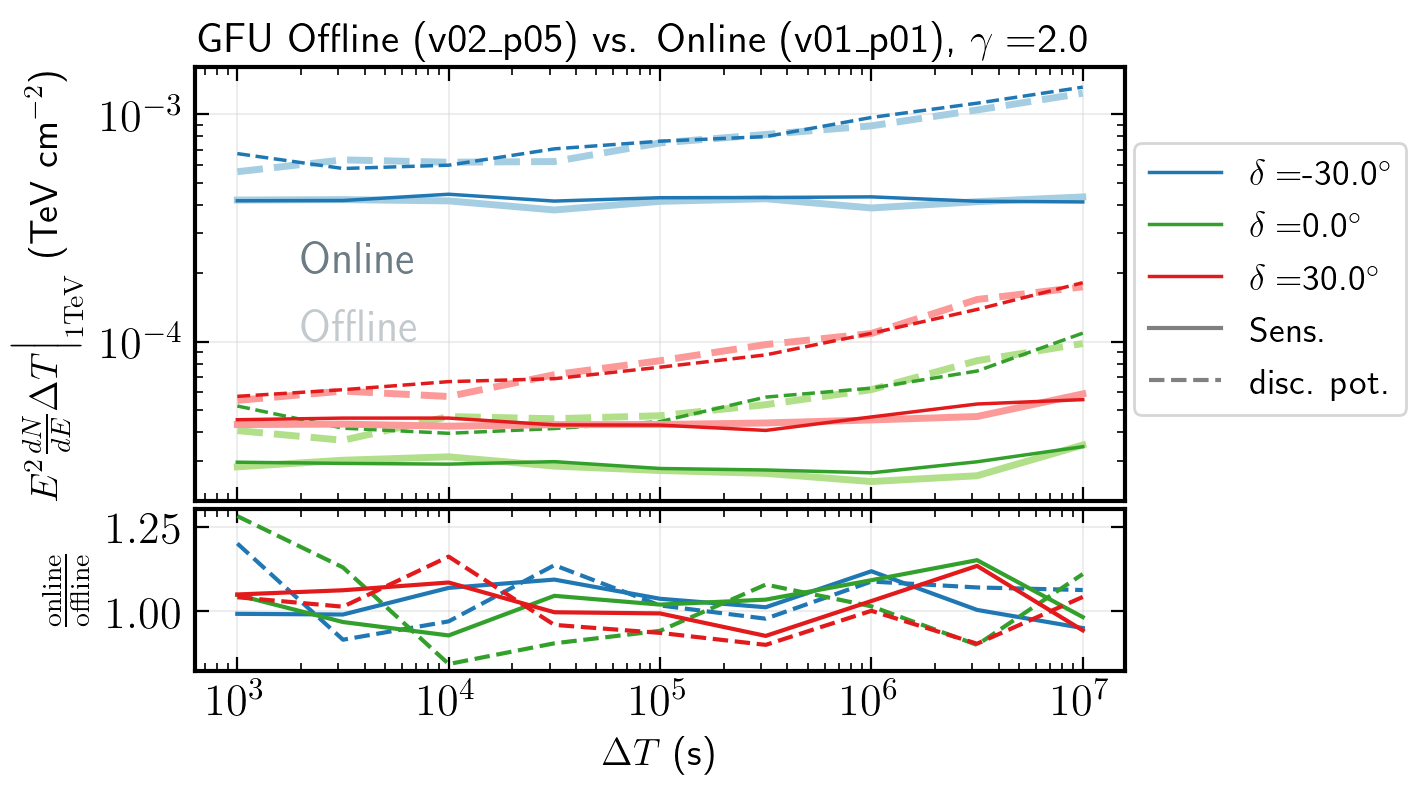

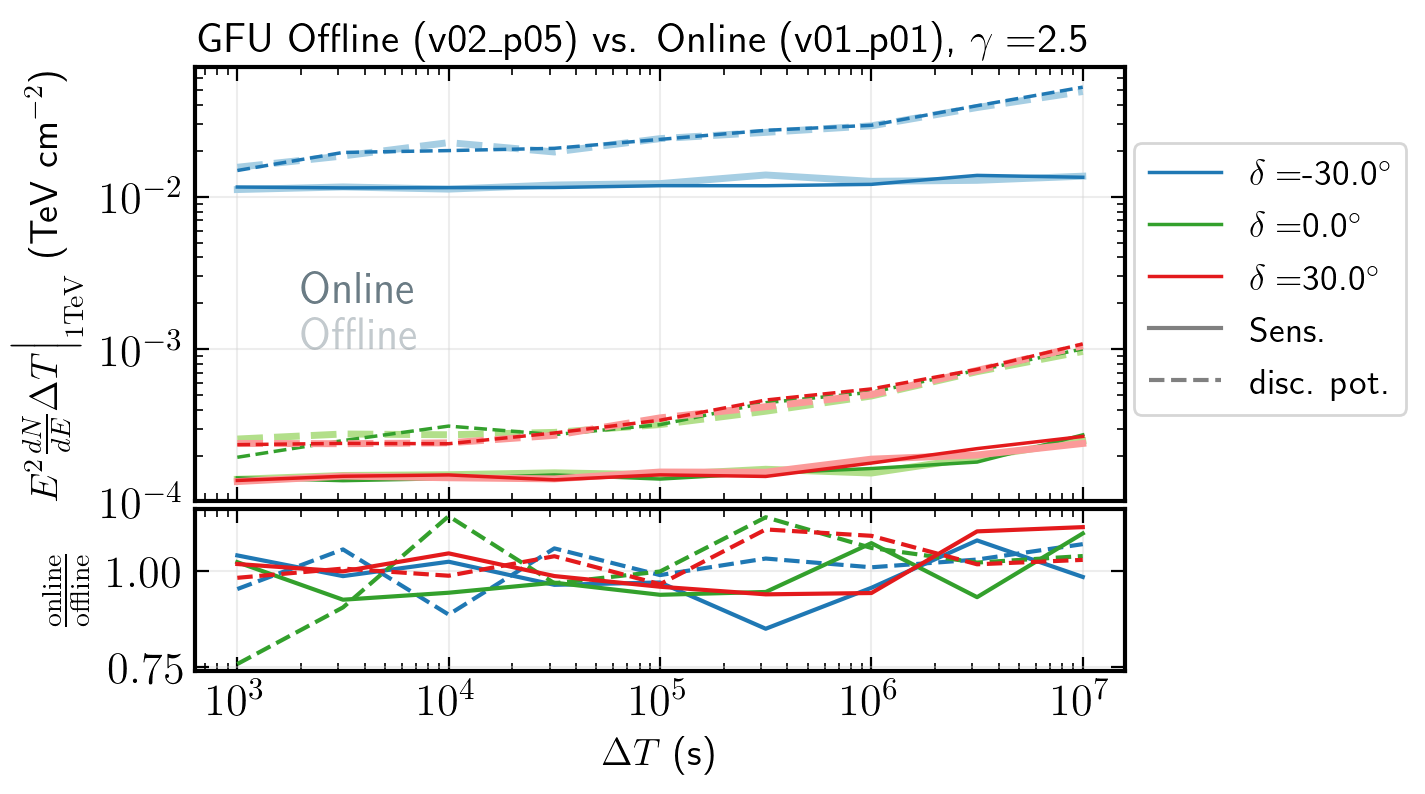

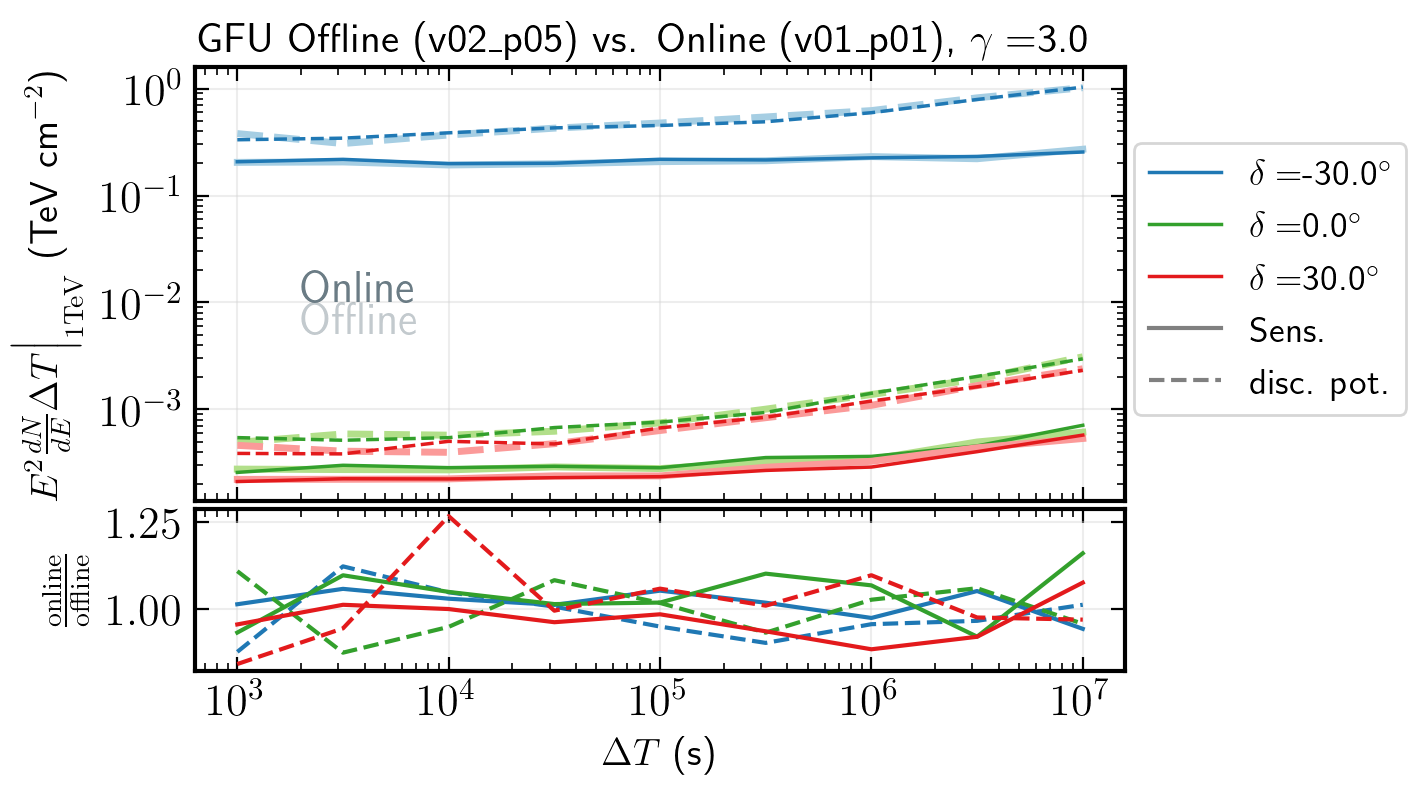

In [23]:
for gamma in inj_gamma:
    fig = plt.figure(dpi=200)
    spec = mpl.gridspec.GridSpec(ncols=1, nrows=2,
                             height_ratios=[4, 1.5])
    ax1 = fig.add_subplot(spec[1])
    ax0 = fig.add_subplot(spec[0], sharex=ax1)
    spec.update(wspace=0.025, hspace=0.025)
    fig.set_facecolor('w')

    for ii, sd in enumerate(all_gamma_results_online[gamma].keys()):
        dec_deg = np.arcsin(sd) * 180. / np.pi
        one_tev_sens = conv_ref_en(all_gamma_results[gamma][sd]['sens_e2dnde'], 1., 100., gamma)
        one_tev_disc = conv_ref_en(all_gamma_results[gamma][sd]['disc_e2dnde'], 1., 100., gamma)
        ax0.plot(all_gamma_results[gamma][sd]['delta_t'], one_tev_sens,
                color=palette[2*ii], lw=2.5, ls='-')
        ax0.plot(all_gamma_results[gamma][sd]['delta_t'], one_tev_disc,
                color=palette[2*ii], lw=2.5, ls='--')
        
        one_tev_sens_online = conv_ref_en(all_gamma_results_online[gamma][sd]['sens_e2dnde'], 1., 100., gamma)
        one_tev_disc_online = conv_ref_en(all_gamma_results_online[gamma][sd]['disc_e2dnde'], 1., 100., gamma)
        ax0.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_sens_online,
                color=palette[2*ii+1], lw=1.25, ls='-', label=r'$\delta = $' 
                 + '{:.1f}'.format(dec_deg) + r'$^{\circ}$')
        ax0.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_disc_online,
                color=palette[2*ii+1], lw=1.25, ls='--')
        
        ax1.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_sens_online / one_tev_sens,
                color=palette[2*ii+1], lw=1.5, ls='-')
        ax1.plot(all_gamma_results_online[gamma][sd]['delta_t'], one_tev_disc_online / one_tev_disc,
                color=palette[2*ii+1], lw=1.5, ls='--')
        
    handles, labels = ax0.get_legend_handles_labels()
    patch = Line2D([0], [0], color='grey', lw=1.5, linestyle='-', label='Sens.')
    handles.append(patch) 
    patch = Line2D([0], [0], color='grey', lw=1.5, linestyle='--', label='disc. pot.')
    handles.append(patch) 

    ax0.legend(loc=(1.01, 0.2), frameon=True, ncol=1, handles=handles, fontsize=13, columnspacing=0.3)
    ax0.set_yscale('log')
    ax0.set_xscale('log')
    #ax0.set_ylim(2e-13, 1e-7)
    texty = {2.0: 2e-4, 2.5: 2e-3, 3.0: 1e-2}[gamma]
    ax0.text(2e3, texty, 'Online', color=sns.xkcd_rgb['battleship grey'])
    ax0.text(2e3, texty*0.5, 'Offline', color=sns.xkcd_rgb['battleship grey'], alpha=0.4)
    #ax1.set_ylim(0.95, 1.2)
    ax1.set_xscale('log')
    plt.setp(ax0.get_xticklabels(), visible=False)
    ax0.set_ylabel(r'$E^2\frac{dN}{dE}\Delta T\bigg|_{\mathrm{1 TeV}}$ (TeV cm$^{-2}$)', fontsize=14)
    ax1.set_xlabel(r'$\Delta T$ (s)', fontsize=14)
    ax1.set_ylabel(r'$\frac{\mathrm{online}}{\mathrm{offline}}$', fontsize=14)
    fig.suptitle("GFU Offline (v02\_p05) vs. Online (v01\_p01), " + r'$\gamma =$' + f'{gamma}', 
                 fontsize=15, y=0.94)
    #plt.tight_layout()
    for stype in ['pdf', 'png']:
        plt.savefig(f'../dump/transient_online_vs_offline_comparison_gamma_{gamma}.{stype}', dpi=200,
                   bbox_inches='tight')
    plt.show()